# Additional figures (hmf metric boxplots by aquifer & huc2, event frequency-duration curves)

In [2]:
# IMPORTS
import os
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import contextily as cx
import requests
import calendar
from importlib import reload

from datetime import datetime, timedelta
from shapely.geometry import Point
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable

# USGS Data retreival tool
from dataretrieval import nwis, utils, codes

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondris\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

### Import national metrics

In [3]:
# All gages - National metrics dfs
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/National_Metrics_50_90.xlsx',
    '30_95': 'Prelim_Data/National_Metrics/National_Metrics_30_95.xlsx',
    '50_95': 'Prelim_Data/National_Metrics/National_Metrics_50_95.xlsx'    
}

dfs_metrics = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}

In [5]:
# Converts site_no to strings
date_ranges = ['30', '50']
percentiles = ['90', '95']
for date_range in date_ranges:
    for percentile in percentiles: 
        # Assuming df is your DataFrame and 'column_name' is the name of the column with numbers
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].astype(str)  # Convert numbers to strings

        # Add leading '0' to numbers with 7 digits
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)

In [20]:
# Valid gages - National metrics dfs
dfs_valid = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        dfs_valid[f'{date_range}_{percentile}'] = dfs_metrics[f'{date_range}_{percentile}'][dfs_metrics[f'{date_range}_{percentile}']['valid'] == True]

In [27]:
# Outlet gages by aquifer
br_outlet_gages = ['09520500', '09429600', '09521100', '09519800', '09468500', '09423000', '10327500', '10351650', '10351650', '10311400']
cc_outlet_gages = ['11023000', '11046000', '11078000', '11087020', '11133000', '11140000', '11152500', '11159000', '11467000', '11477000', '11530500', '11532500']
cv_outlet_gages = ['11303500', '11447650']
cl_outlet_gages = ['08211000', '08188500', '08176500', '08164000', '08162000', '08116650', '08066500', '08033500', '08068000', '08030500',
      '08013500', '08012000', '07378500', '02492000', '02489500', '02479000', '02479300', '02469761', '02428400', '02375500']
fl_outlet_gages = ['02368000', '02365500', '02358000', '02320500', '02313230']
hp_outlet_gages = ['06465500', '06805500', '06853500', '06884000', '07144550', '07158000', '07237500', '07228000', '07297910', '08123850']
mr_outlet_gages = ['07077000', '07077555', '07047942', '07369000', '07369000', '07285500', '07268000']
na_outlet_gages = ['02105769', '02089500', '02091500', '02083500',  '02085000', '02052000', '02047000', '02049500',  '02041650', '02037500', '01668000', 
      '01673000',  '01646500', '01578310', '01474500',  '01463500']
pn_outlet_gages = ['11039800', '12200500', '12040500', '14211720',  '14372300']
sr_outlet_gages = ['13269000']
cp_outlet_gages = ['13342500', '13334300', '12472800', '12510500', '13351000', '14033500', '14048000', '14103000']
rg_outlet_gages = ['08319000']
me_outlet_gages = ['07029500', '07268000', '07283000', '07285500', '07289350', '02482550', '02477000', '02469761', '02428400', 
                   '07362000', '07363500', '07348700']
co_outlet_gages = ['05378500', '05407000', '05437500', '04082400']
sc_outlet_gages = ['02130561', '02171500', '02197000', '02223248', '02343801', '02467000']
bi_outlet_gages = ['02287497', '02289060', '02290765', '02290769']
et_outlet_gages = ['07337000', '08062700', '08159200', '08168500']
rm_outlet_gages = ['12389000', '06066500', '13302500']
pb_outlet_gages = ['02341475', '02339500', '02347500', '02213000', '02223000', '02197000', '02169500', 
'02148000', '02130561', '02102500', '02089000', '02083500' ,'02080500', '01646500', '01578310']
sa_outlet_gages = ['02359170', '02243960', '02296750', '02292900', '02226000', '02202500', '02198500', '02175000', '02171645']
vr_outlet_gages = ['02388500', '02397000', '03513000', '03455000', '03168000', '02019500', '01638500', '01570500']
sd_outlet_gages = ['05465500', '05420500', '05527500', '03335500']
pnb_outlet_gages = ['13087995', '12395500']
wl_outlet_gages = ['14211720']
lc_outlet_gages = ['05476750', '05479000', '05482300', '05483450', '06602020', '06606600', '06607200',
       '06809210', '06486000', '06601200', '06864500', '06865500', '06868200', '06869500',
       '06876700', '06884025', '06884200', '05061500', '05304500', '05313500', '05317000',
       '05476000', '06078200', '06090300', '06200000', '06601000', '06803000', '06803500',
       '06803510', '06803530', '06804000', '06881000', '05085000', '06395000', '06400000',
       '06402500', '06406000', '06414000', '06430500', '06433000', '06436000', '06436190',
       '06429997', '06279500', '06634620']

outlet_gages_dict_10 = {
    'br': br_outlet_gages, 
    'cc': cc_outlet_gages,
    'cv': cv_outlet_gages,
    'cl': cl_outlet_gages,
    'fl': fl_outlet_gages,
    'hp': hp_outlet_gages,
    'mr': mr_outlet_gages,
    'na': na_outlet_gages,
    'pn': pn_outlet_gages,
    'sr': sr_outlet_gages
}

outlet_gages_dict_25 = {
    'br': br_outlet_gages, 
    'cc': cc_outlet_gages,
    'cv': cv_outlet_gages,
    'cl': cl_outlet_gages,
    'fl': fl_outlet_gages,
    'hp': hp_outlet_gages,
    'mr': mr_outlet_gages,
    'na': na_outlet_gages,
    'pn': pn_outlet_gages,
    'sr': sr_outlet_gages,
    'cp': cp_outlet_gages,
    'rg': rg_outlet_gages,
    'me': me_outlet_gages,
    'co': co_outlet_gages,
    'sc': sc_outlet_gages,
    'bi': bi_outlet_gages,
    'et': et_outlet_gages,
    'rm': rm_outlet_gages,
    'pb': pb_outlet_gages,
    'sa': sa_outlet_gages,
    'vr': vr_outlet_gages,
    'sd': sd_outlet_gages,
    'pnb': pnb_outlet_gages,
    'wl': wl_outlet_gages,
    'lc': lc_outlet_gages}

aq_names_10 = {'hp': 'High Plains aquifer',
                'mr': 'Mississippi River Valley alluvial aquifer',
                'cv': 'Central Valley aquifer system',
                'br': 'Basin and Range basin-fill aquifers',
                'fl': 'Floridan aquifer system',
                'sr': 'Snake River Plain basaltic-rock aquifers',
                'cl': 'Coastal lowlands aquifer system',
                'cc': 'California Coastal Basin aquifers', 
                'pn': 'Pacific Northwest basin-fill aquifers',
                'na': 'Northern Atlantic Coastal Plain aquifer system'}

aq_names_25 = {'hp': 'High Plains aquifer',
                'mr': 'Mississippi River Valley alluvial aquifer',
                'cv': 'Central Valley aquifer system',
                'br': 'Basin and Range basin-fill aquifers',
                'fl': 'Floridan aquifer system',
                'sr': 'Snake River Plain basaltic-rock aquifers',
                'cl': 'Coastal lowlands aquifer system',
                'cc': 'California Coastal Basin aquifers', 
                'pn': 'Pacific Northwest basin-fill aquifers',
                'na': 'Northern Atlantic Coastal Plain aquifer system',
                'cp': 'Columbia Plateau basaltic-rock aquifers',
                'rg': 'Rio Grande aquifer system',
                'me': 'Mississippi embayment aquifer system',
                'co': 'Cambrian-Ordovician aquifer system',
                'sc': 'Southeastern Coastal Plain aquifer system',
                'bi': 'Biscayne aquifer',
                'et': 'Edwards-Trinity aquifer system',
                'rm': 'Northern Rocky Mountains Intermontane Basins aquifer system',
                'pb': 'Piedmont and Blue Ridge crystalline-rock aquifers',
                'sa': 'Surficial aquifer system',
                'vr': 'Valley and Ridge aquifers',
                'sd': 'Silurian-Devonian aquifers',
                'pnb': 'Pacific Northwest basaltic-rock aquifers',
                'wl': 'Willamette Lowland basin-fill aquifers',
                'lc': 'Lower Cretaceous aquifers'
              }

aq_codes_10 = ['hp', 'mr', 'cv', 'br', 'fl', 'sr', 'cl', 'cc', 'pn', 'na']

aq_codes_25 = ['hp', 'mr', 'cv', 'br', 'fl', 'sr', 'cl', 'cc', 'pn', 'na',
              'cp', 'rg', 'me', 'co', 'sc', 'bi', 'et', 'rm', 'pb', 'sa',
              'vr', 'sd', 'pnb', 'wl', 'lc']

### Sort by outlet gages

In [28]:
df_outlet_gages = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        df_outlet_gages_aq = {}
        df_temp = dfs_valid[f'{date_range}_{percentile}']

        for key, value in outlet_gages_dict_25.items():
            df_outlet_gages_aq[key] = df_temp[df_temp['site_no'].isin(value)]
            #print(df_outlet_gages_aq)
       
        df_outlet_gages[f'{date_range}_{percentile}'] = df_outlet_gages_aq

In [29]:
df_outlet_gages['30_90']['br'].columns

Index(['site_no', 'analyze_start', 'analyze_end', 'analyze_range', 'quantile',
       'valid', 'missing_data%', 'threshold', 'hmf_years', 'annual_hmf',
       'six_mo_hmf', 'three_mo_hmf', 'annual_duration', 'event_duration',
       'event_hmf', 'inter_annual%', 'intra_annual', 'timing', 'jan_hmf',
       'feb_hmf', 'mar_hmf', 'apr_hmf', 'may_hmf', 'jun_hmf', 'jul_hmf',
       'aug_hmf', 'sep_hmf', 'oct_hmf', 'nov_hmf', 'dec_hmf', 'dec_lat_va',
       'dec_long_va', 'data_start', 'data_end', 'total_record', 'state',
       'huc2_code', 'huc4_code', 'within_aq', 'HCDN_2009'],
      dtype='object')

In [13]:
import geopandas as gpd
import matplotlib.colors as mcolors
aq_usgs_selected_10 = gpd.read_file('ShapeFiles/Aquifers_USGS_10/Aquifers_USGS_10.shp')
aq_list_10 = aq_usgs_selected_10['AQ_NAME'].tolist()
color_names_10 = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink']
#color_names_10 = ['darkorange', 'lightgreen', 'tomato', 'yellow', 'orange', 
#                  'red', 'orangered', 'limegreen', 'forestgreen', 'gold']
colors_by_name_10 = [mcolors.CSS4_COLORS[name] for name in color_names_10]
colors_dict_10 = dict(zip(aq_list_10, colors_by_name_10))

In [82]:
metric = 'timing'
metric_list = ['annual_hmf', 'annual_duration', 'event_duration',
               'event_hmf', 'inter_annual%', 'intra_annual', 'timing']
aq_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink']
alpha_list = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
date_range = '30'
percentile = '90'

def outlet_gages_metrics_boxplot(metric, date_range, percentile):
    fig, ax = plt.subplots(figsize=(18, 6))
    # plt.boxplot([df_outlet_gages[f'{date_range}_{percentile}']['hp'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['mr'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['cv'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['br'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['fl'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['sr'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['cl'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['cc'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['pn'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['na'][metric]
    #             ])

    for j, aq_code in enumerate(aq_codes):
        ax.boxplot(df_outlet_gages[f'{date_range}_{percentile}'][aq_code][metric], positions=[j], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor=aq_colors[j], alpha=alpha_list[j]), 
                medianprops=dict(color='#000000'),
                showmeans=True, meanprops={"marker":"x", "markeredgecolor":"black", "markersize":"10"})

    tick_labels = ['High Plains',
                    'Mississippi \n River Valley',
                    'Central Valley ',
                    'Basin and \n Range',
                    'Floridan',
                    'Snake River \n Plain',
                    'Coastal \n Lowlands',
                    'California \n Coastal Basin ', 
                    'Pacific \n Northwest ',
                    'Northern Atlantic \n Coastal Plain']

    plt.xticks([0,1,2,3,4,5,6,7,8,9], tick_labels, fontsize=14)
    plt.tick_params(axis='y', which='major', labelsize=18)
    plt.ylabel(f'{fn.FLOW_METRIC_UNITS[metric]}', fontsize=20)
    plt.title(f'{fn.FLOW_METRIC_UNITS[metric]} ({date_range}-Year Record, {percentile}th Percentile)', fontsize=24)

    plt.savefig(f'Saved_Visuals/Aquifers/HMF_metrics/boxplots_{metric}_{date_range}_{percentile}.png', bbox_inches='tight')

    plt.show()
    return
              
# for date_range in date_ranges:
#     for percentile in percentiles:
#         for metric in metric_list:
#               outlet_gages_metrics_boxplot(metric, date_range, percentile)

In [ ]:
metric = 'timing'
metric_list = ['annual_hmf', 'annual_duration', 'event_duration',
               'event_hmf', 'inter_annual%', 'intra_annual', 'timing']
aq_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink']
alpha_list = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
date_range = '30'
percentile = '90'

def outlet_gages_metrics_boxplot(metric, date_range, percentile):
    fig, ax = plt.subplots(figsize=(18, 6))
    # plt.boxplot([df_outlet_gages[f'{date_range}_{percentile}']['hp'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['mr'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['cv'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['br'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['fl'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['sr'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['cl'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['cc'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['pn'][metric],
    #              df_outlet_gages[f'{date_range}_{percentile}']['na'][metric]
    #             ])

    for j, aq_code in enumerate(aq_codes):
        ax.boxplot(df_outlet_gages[f'{date_range}_{percentile}'][aq_code][metric], positions=[j], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor=aq_colors[j], alpha=alpha_list[j]), 
                medianprops=dict(color='#000000'),
                showmeans=True, meanprops={"marker":"x", "markeredgecolor":"black", "markersize":"10"})

    tick_labels = ['High Plains',
                    'Mississippi \n River Valley',
                    'Central Valley ',
                    'Basin and \n Range',
                    'Floridan',
                    'Snake River \n Plain',
                    'Coastal \n Lowlands',
                    'California \n Coastal Basin ', 
                    'Pacific \n Northwest ',
                    'Northern Atlantic \n Coastal Plain']

    plt.xticks([0,1,2,3,4,5,6,7,8,9], tick_labels, fontsize=14)
    plt.tick_params(axis='y', which='major', labelsize=18)
    plt.ylabel(f'{fn.FLOW_METRIC_UNITS[metric]}', fontsize=20)
    plt.title(f'{fn.FLOW_METRIC_UNITS[metric]} ({date_range}-Year Record, {percentile}th Percentile)', fontsize=24)

    plt.savefig(f'Saved_Visuals/Aquifers/HMF_metrics/boxplots_{metric}_{date_range}_{percentile}.png', bbox_inches='tight')

    plt.show()
    return
              
for date_range in date_ranges:
    for percentile in percentiles:
        for metric in metric_list:
              outlet_gages_metrics_boxplot(metric, date_range, percentile)

### Sort by HUC2

In [52]:
df_temp = dfs_valid['30_90']
huc2_codes = dfs_valid['30_90']['huc2_code'].unique().tolist()
#huc2_codes
dict_huc2 = {}
for huc2_code in huc2_codes:
    dict_huc2[huc2_code] = df_temp[df_temp['huc2_code'] == huc2_code]['site_no'].unique().tolist()
#dict_huc2 

In [53]:
df_huc2_gages = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        df_huc2_huc = {}
        df_temp = dfs_valid[f'{date_range}_{percentile}']

        for key, value in dict_huc2.items():
            df_huc2_huc[key] = df_temp[df_temp['site_no'].isin(value)]
       
        df_huc2_gages[f'{date_range}_{percentile}'] = df_huc2_huc

In [54]:
huc2_codes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink',
               'teal', 'lavender', 'brown', 'black', 'maroon', 'lightblue', 'coral', 'olive']
metric_list = ['annual_hmf', 'annual_duration', 'event_duration',
               'event_hmf', 'inter_annual%', 'intra_annual', 'timing']

def huc2_gages_metrics_boxplot(metric, date_range, percentile):
    fig, ax = plt.subplots(figsize=(20, 6))
    # plt.boxplot([df_huc2_gages[f'{date_range}_{percentile}'][1][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][2][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][3][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][4][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][5][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][6][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][7][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][8][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][9][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][10][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][11][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][12][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][13][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][14][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][15][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][16][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][17][metric],
    #              df_huc2_gages[f'{date_range}_{percentile}'][18][metric]
    #             ])

    for j, code in enumerate(huc2_codes):
        ax.boxplot(df_huc2_gages[f'{date_range}_{percentile}'][code][metric], positions=[j], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor=colors[j]), #alpha=alpha_list[j]), 
                medianprops=dict(color='#000000'),
                showmeans=True, meanprops={"marker":"x", "markeredgecolor":"black", "markersize":"10"})

    tick_labels = ['HUC1', 'HUC2', 'HUC3', 'HUC4', 'HUC5', 'HUC6', 'HUC7', 'HUC8', 'HUC9',
                   'HUC10', 'HUC11', 'HUC12', 'HUC13', 'HUC14', 'HUC15', 'HUC16', 'HUC17', 'HUC18']

    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], tick_labels, fontsize=14)
    plt.tick_params(axis='y', which='major', labelsize=18)
    plt.ylabel(f'{fn.FLOW_METRIC_UNITS[metric]}', fontsize=20)
    plt.title(f'{fn.FLOW_METRIC_UNITS[metric]} ({date_range}-Year Record, {percentile}th Percentile)', fontsize=24)

    plt.savefig(f'Saved_Visuals/HUC2/HMF_metrics/boxplots_{metric}_{date_range}_{percentile}.png', bbox_inches='tight')

    plt.show()
    return

# for date_range in date_ranges:
#     for percentile in percentiles:
#         for metric in metric_list:
#               huc2_gages_metrics_boxplot(metric, date_range, percentile)

## Event frequency duration curve

### Generate events subdf for all outlet gages

In [41]:
# Function to calculate subdf for given gage
df_results = pd.DataFrame()

# This is a cut down version of single_site_analysis() focused only on event metrics
def events_subdf(site, date_range, quantile):
    CUBIC_FT_KM_FACTOR = 0.0000000000283168466
    #if i == test_limit: break
    df = nwis.get_record(sites=site, service=fn.SERVICE, parameterCD=[fn.PARAM_CODE, fn.TIDAL_CODE], start=fn.DEFAULT_START, end=fn.DEFAULT_END)
    df = df.reset_index()

    # Only run on valid sites so this should never be the case but check anyways
    #if df.empty: continue

    if '00060_radar sensor_Mean' in df.columns and '00060_Mean' not in df.columns:
        df.rename(columns={'00060_radar sensor_Mean': '00060_Mean'}, inplace=True)

    df = fn.merge_tidal(df)

    # Cropping to date range
    date_threshold = pd.to_datetime(fn.DEFAULT_END).date() - timedelta(days=365.25 * date_range)
    df = df[df['datetime'].dt.date >= date_threshold]

    threshold = fn.calc_threshold(df, (int(quantile) / 100))
    _, hmf_series_cont = fn.filter_hmf(df, threshold)
    hmf_series_cont_cfs = fn.convert_hmf(hmf_series_cont, threshold)

    hmf_series_cont['00060_Mean'] = hmf_series_cont_cfs['00060_Mean'] * CUBIC_FT_KM_FACTOR
    #hmf_series_cont.to_csv('hmf_series_cont.csv')

    # Insert a dummy row at the end to ensure the last event is captured
    last = hmf_series_cont['datetime'].iloc[-1] + timedelta(days=1)
    insert = {'datetime': last, '00060_Mean': 0, 'site_no': site}
    hmf_series_cont = pd.concat([hmf_series_cont, pd.DataFrame(insert, index=[0])]).reset_index(drop=True)

    event_count = hmf = duration = 0
    event = False
    start = end = None
    df_results = pd.DataFrame()
    for i, row in hmf_series_cont.iterrows():     

        # No current event and none starting now
        if row['00060_Mean'] == 0 and event == False:
            event = False
            continue

        # New event starting
        if row['00060_Mean'] > 0 and event == False:
            hmf = row['00060_Mean']
            start = row['datetime'].date()
            duration = 1
            event_count += 1
            event = True
            continue

        # Current event continuing
        if row['00060_Mean'] > 0 and event == True:
            hmf += row['00060_Mean']
            duration += 1
            event = True
            continue

        # Current event ending, add to dataframe
        if row['00060_Mean'] == 0 and event == True:
            end = row['datetime'].date() - timedelta(days=1)
            data = {'site_no': site, 'event': event_count, 'start': start, 'end': end, 'hmf': hmf, 'duration': duration}
            df_results = pd.concat([df_results, pd.DataFrame(data, index=[0])])
            event = False
            continue

    df_results = df_results.reset_index(drop=True) 
    return df_results#, hmf_series_cont
    #df_results.to_csv(f'events_subdf.csv')

In [32]:
# QA/QC for one gage
date_range = 50
quantile = 90
df_results_test, df_test = events_subdf('11447650', date_range, percentile)
df_results_test[0:20]
#subdf_test = df_test[(df_test['datetime'] > '2019-02-13') & (df_test['datetime'] < '2019-02-24')]
#subdf_test['00060_Mean'].sum()

,site_no,event,start,end,hmf,duration
0,11447650,1,1970-12-03,1970-12-13,0.038901,11
1,11447650,2,1971-01-20,1971-01-23,0.014924,4
2,11447650,3,1973-01-13,1973-01-26,0.424726,14
3,11447650,4,1973-02-10,1973-02-18,0.114500,9
4,11447650,5,1973-03-01,1973-03-09,0.054559,9
5,11447650,6,1973-11-16,1973-11-22,0.083918,7
6,11447650,7,1973-12-29,1974-01-03,0.076088,6
7,11447650,8,1974-01-08,1974-01-08,0.004404,1
8,11447650,9,1974-01-16,1974-02-04,0.500080,20
9,11447650,10,1974-03-04,1974-03-04,0.002202,1


In [31]:
# Generate events subdf nested dictionary with each key for the aquifer, and nested keys for the gage number
date_range = 30
quantile = 90
aq_codes = ['hp', 'mr', 'cv', 'br', 'fl', 'sr', 'cl', 'cc', 'pn', 'na']
events_by_aq_dict_30_90 = {}
for aq in aq_codes:
    gages = outlet_gages_dict_10[aq]
    #print(gages)
    events_by_gage_dict = {}
    for gage in gages:
        print(gage)
        events_by_gage_dict[gage] = events_subdf(gage, date_range, quantile)
    events_by_aq_dict_30_90[aq] = events_by_gage_dict

06465500
06805500
06853500
06884000
07144550
07158000
07237500
07228000
07297910
08123850
07077000
07077555
07047942
07369000
07369000
07285500
07268000
11303500
11447650
09520500
09429600
09521100
09519800
09468500
09423000
10327500
10351650
10351650
10311400
02368000
02365500
02358000
02320500
02313230
13269000
08211000
08188500
08176500
08164000
08162000
08116650
08066500
08033500
08068000
08030500
08013500
08012000
07378500
02492000
02489500
02479000
02479300
02469761
02428400
02375500
11023000
11046000
11078000
11087020
11133000
11140000
11152500
11159000
11467000
11477000
11530500
11532500
11039800
12200500
12040500
14211720
14372300
02105769
02089500
02091500
02083500
02085000
02052000
02047000
02049500
02041650
02037500
01668000
01673000
01646500
01578310
01474500
01463500


In [56]:
#pd.set_option('display.max_rows', 90)
#events_by_aq_dict_50_90['cv']['11447650']

### Plot FDC for individual gages in each aquifer

In [33]:
# Function to group events by duration, count the number of events for each duration, 
# and calculate the MEAN or SUM of hmf values for each event
def sort_events(df, by='sum'):
    df_sort_dur = df.sort_values('duration')
    #df_sort_mean = df_sort_dur.groupby('duration').mean()
    df_sort = df_sort_dur.groupby('duration')['hmf'].agg([by, 'size']).reset_index()
    df_sort = df_sort.rename(columns={'size':'count'})
    df_sort = df_sort.rename(columns={by:'hmf'})  
    return df_sort

# QA/QC
# events_test = events_by_aq_dict_50_90['cv']['11447650']
# group_mean = events_test.groupby('duration')['hmf'].agg(['sum', 'size']).reset_index()
# group_sum = events_test.groupby('duration').sum().reset_index()
# print(events_test)
# print(group_mean.head())
# print(group_sum.head())

In [61]:
# Function to generate the FDC for a single gage
import matplotlib.ticker as mticker

def fdc_single_site(df, aq):
    df_plot = df

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

    cm = plt.cm.get_cmap('OrRd') #RdYlBl
    scatter = ax.scatter(df_plot['duration'], df_plot['count'], c=df_plot['hmf'], vmin=0, vmax=df_plot['hmf'].max(), s=70, cmap=cm, edgecolors='grey')

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Total event HMF at given duration ($\mathregular{km^3}$)', fontsize=18)
    cbar.ax.tick_params(labelsize=16)

    ax.set_xlabel('Duration of HMF event (days)', fontsize=18)
    ax.set_ylabel('Number of HMF events', fontsize=18)
    ax.set_title(f'HMF Event Frequency Duration Curve: \n Gage No:{int(gage)}', fontsize=20)

    plt.xscale("log")
    plt.yscale("log")

    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    if aq == 'cv':
        ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
        ax.yaxis.get_minor_formatter().set_scientific(False)
        ax.yaxis.get_minor_formatter().set_useOffset(False)
    #ax.mticker.FormatStrFormatter('%d')

    plt.grid('True', which="both", ls="-")
    
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=18)

    img_path = f'Saved_Visuals/Aquifers/fre_dur_curve/gages/fdc_{aq}_{gage}.png'
    plt.savefig(img_path, bbox_inches='tight')

    plt.show()
    return

In [42]:
# Plot FDCs for gages in a given aquifer
# aq = 'cv'
# for gage in outlet_gages_dict[aq]:
#     df = sort_events(events_by_aq_dict_50_90[aq][gage], by='sum')
#     fdc_single_site(df, aq)

08211000
08188500
08176500
08164000
08162000
08116650
08068000
08066500
08033500
08030500


### Generate and plot FDCs for all outlet gages by aquifer

In [87]:
# Store outlet events for each aquifer in a dictionary
grouped_aq_events_dict_50_90 = {}
for aq in aq_codes:
    df_aq = pd.DataFrame()
    for gage in outlet_gages_dict[aq]:
        df_events_gages_sort = sort_events(events_by_aq_dict_50_90[aq][gage], by='sum')
        df_aq = df_aq.append(df_events_gages_sort)
    grouped_df_aq = df_aq.groupby('duration').sum().reset_index()
    grouped_aq_events_dict_50_90[aq] = grouped_df_aq

# Texas coastal aquifers
df_texas_gages_50_90 = pd.DataFrame()
for gage in texas_gages:
    df_events_gages_sort = sort_events(events_by_aq_dict_50_90[gage], by='sum')
    df_texas_gages_50_90 = df_texas_gages_50_90.append(df_events_gages_sort)
df_texas_gages_grouped_50_90 = df_texas_gages_50_90.groupby('duration').sum().reset_index()
    
# # Central valley aquifers
# df_cv_gages_50_90 = pd.DataFrame()
# for gage in cv_outlet_gages:
#     df_events_gages_sort = sort_events(events_by_aq_dict_50_90['cv'][gage], by='sum')
#     df_cv_gages_50_90 = df_cv_gages_50_90.append(df_events_gages_sort)
    
# df_cv_gages_grouped_50_90 = df_cv_gages_50_90.groupby('duration').sum().reset_index()

In [89]:
#grouped_aq_events_dict_50_90

In [58]:
import matplotlib.ticker as mticker

def fdc_events(df, aq):
    df_plot = df

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

    cm = plt.cm.get_cmap('OrRd')
    scatter = ax.scatter(df_plot['duration'], df_plot['count'], c=df_plot['hmf'], vmin=0, vmax=df_plot['hmf'].max(), s=70, cmap=cm, edgecolors='grey')

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Total event HMF at given duration ($\mathregular{km^3}$)', fontsize=20)
    cbar.ax.tick_params(labelsize=16)

    ax.set_xlabel('Duration of HMF event (days)', fontsize=20)
    ax.set_ylabel('Number of HMF events', fontsize=20)
    if aq == 'Texas Gulf':
        ax.set_title(f'HMF Event Frequency Duration Curve: \n {aq}', fontsize=24)
    else:
        ax.set_title(f'HMF Event Frequency Duration Curve: \n {aq_names_10[aq]}', fontsize=24)

    plt.xscale("log")
    plt.yscale("log")

    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    #ax.mticker.FormatStrFormatter('%d')

    plt.grid('True', which="both", ls="-")
    
    plt.tick_params(axis='both', which='major', labelsize=18)

    img_path = f'Saved_Visuals/Aquifers/fre_dur_curve/fdc_{aq}.png'
    fn.save_plot_as_image(img_path, overwrite=True) 

    plt.show()

### Texas Gulf Coast aquifer (test)

In [ ]:
# Texas coastal aquifers - Generate events_dict for all gages
aq = 'Texas Gulf'

date_range = 30
quantile = 90
events_by_aq_dict_tx = {}
texas_gages = ['08211000', '08188500', '08176500', '08164000', '08162000', '08116650', '08068000', '08066500', '08033500', '08030500'] #'08116650',
for gage in texas_gages:
    events_by_aq_dict_tx[gage] = events_subdf(gage, date_range, quantile)

In [68]:
# Texas coastal aquifers - Sort all events and plot FDC
df_list = []
for gage in texas_gages:
    df_events_gages_sort = sort_events(events_by_aq_dict_tx[gage], by='sum')
    df_list.append(df_events_gages_sort)
df_texas_gages_30_90 = pd.concat(df_list, ignore_index=True)
df_texas_gages_grouped_30_90 = df_texas_gages_30_90.groupby('duration').sum().reset_index()
print(df_texas_gages_grouped_30_90)

    duration        hmf  count
0          1   0.505122    380
1          2   2.280960    380
2          3   4.405921    312
3          4   6.896855    254
4          5   7.339900    180
..       ...        ...    ...
64        92   5.535695      1
65        98   5.701255      1
66       107   0.934078      1
67       112  10.516116      1
68       142   2.865723      1

[69 rows x 3 columns]


In [80]:
df_texas_gages_grouped_30_90['duration'].max()

np.int64(142)

In [81]:
df = df_texas_gages_grouped_30_90
print('Total number of HMF events over record:', df['count'].sum())
print('Total HMF over record:', df['hmf'].sum())

n1 = 1
n2 = 3
print('Total number of 1-3 day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['count'].sum())
print('Percent of 1-3 day HMF events over record:', (df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['count'].sum()) / df['count'].sum() * 100)
print('Total HMF of 1-3 day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['hmf'].sum())
print('Percent HMF of 1-3 day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['hmf'].sum() / df['hmf'].sum() * 100)

n1 = 7
n2 = 20
print('Total number of 7-20 day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['count'].sum())
print('Percent of 7-20 day HMF events over record:', (df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['count'].sum()) / df['count'].sum() * 100)
print('Total HMF of 7-20 day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['hmf'].sum())
print('Percent HMF of 7-20 day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['hmf'].sum() / df['hmf'].sum() * 100)

n1 = 7 
n2 = df_texas_gages_grouped_30_90['duration'].max()
print('Total number of 7+ day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['count'].sum())
print('Percent of 7+ day HMF events over record:', (df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['count'].sum()) / df['count'].sum() * 100)
print('Total HMF of 7+ day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['hmf'].sum())
print('Percent HMF of 7+ day HMF events over record:', df.loc[df['duration'].isin(np.arange(n1, n2+1, 1).tolist())]['hmf'].sum() / df['hmf'].sum() * 100)

Total number of HMF events over record: 2445
Total HMF over record: 329.7549221758335
Total number of 1-3 day HMF events over record: 1072
Percent of 1-3 day HMF events over record: 43.84458077709611
Total HMF of 1-3 day HMF events over record: 7.192002896553138
Percent HMF of 1-3 day HMF events over record: 2.1810145695772767
Total number of 7-20 day HMF events over record: 628
Percent of 7-20 day HMF events over record: 25.685071574642127
Total HMF of 7-20 day HMF events over record: 121.27519331575428
Percent HMF of 7-20 day HMF events over record: 36.777371666066394
Total number of 7+ day HMF events over record: 796
Percent of 7+ day HMF events over record: 32.556237218813905
Total HMF of 7+ day HMF events over record: 299.23710997264794
Percent HMF of 7+ day HMF events over record: 90.74530502780101


C:\Users\kondris\AppData\Local\Temp\ipykernel_117128\2137726336.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('OrRd')


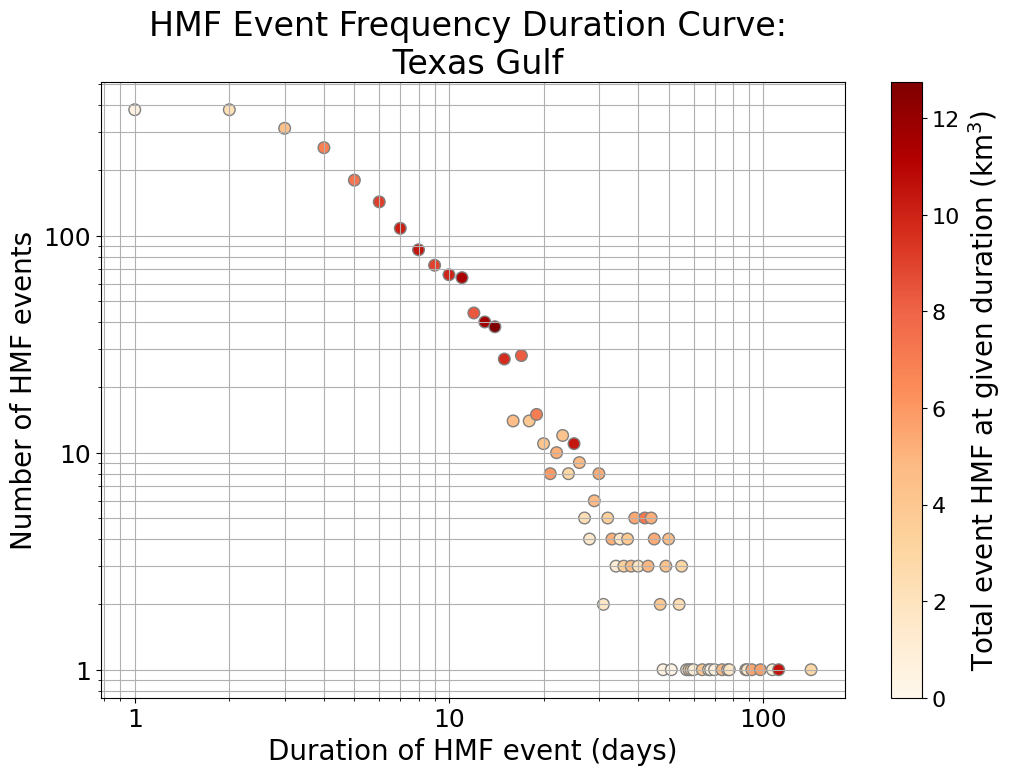

In [63]:
fdc_events(df_texas_gages_grouped_30_90, 'Texas Gulf')

### All aquifers

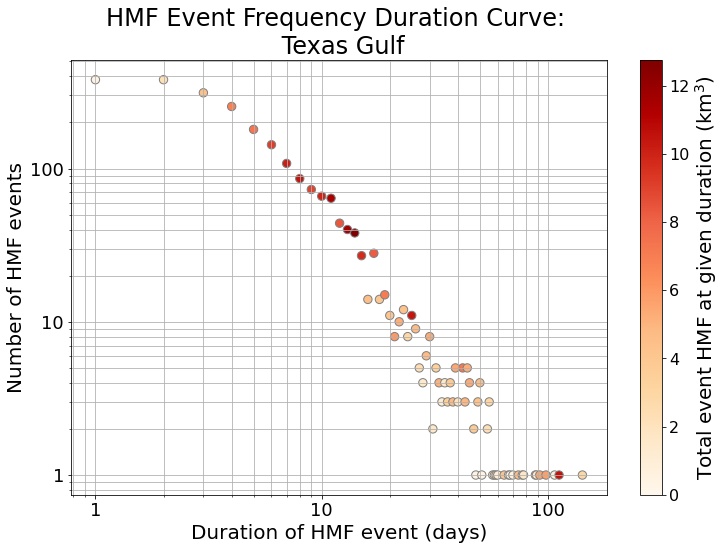

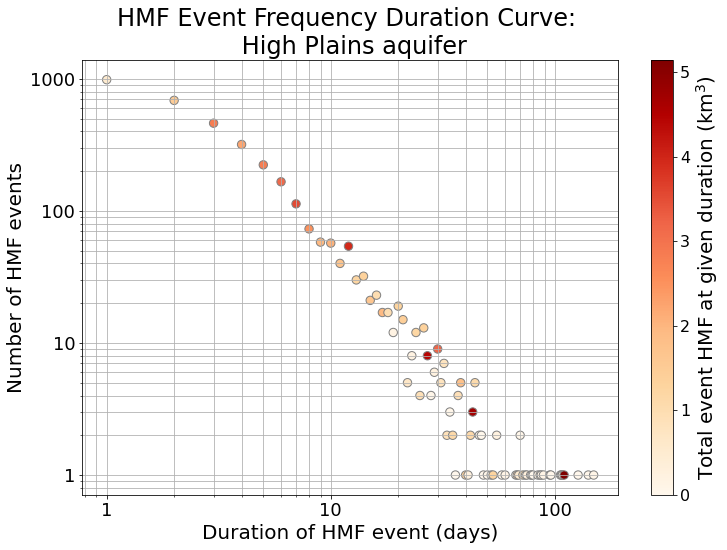

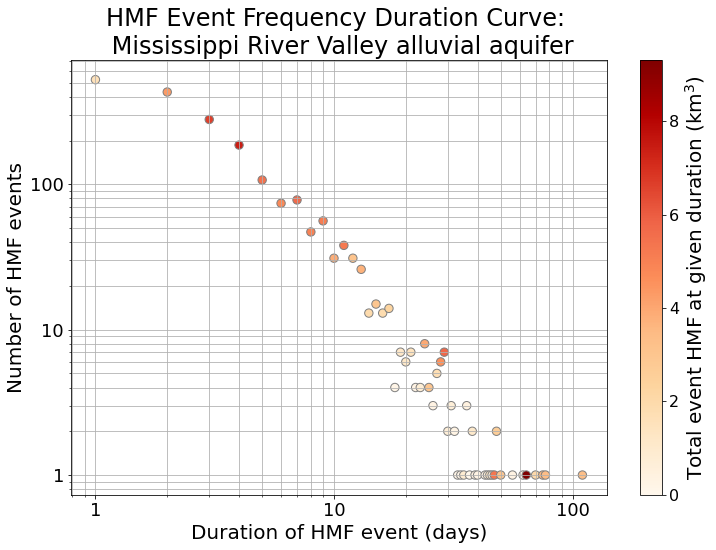

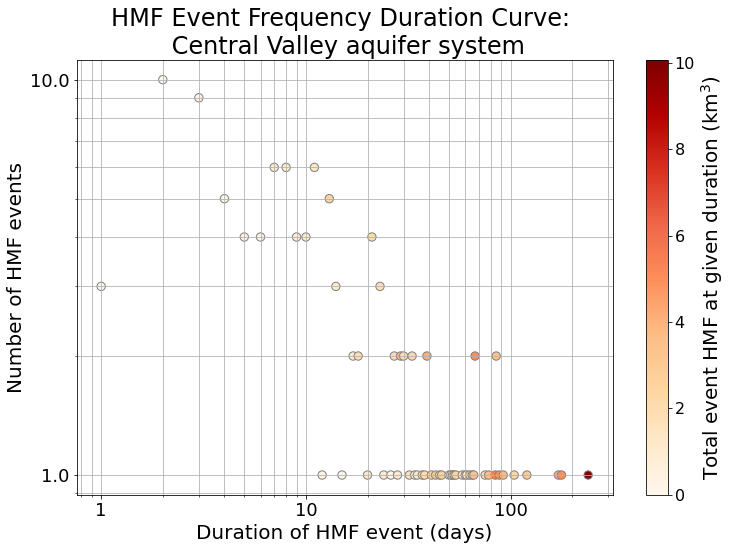

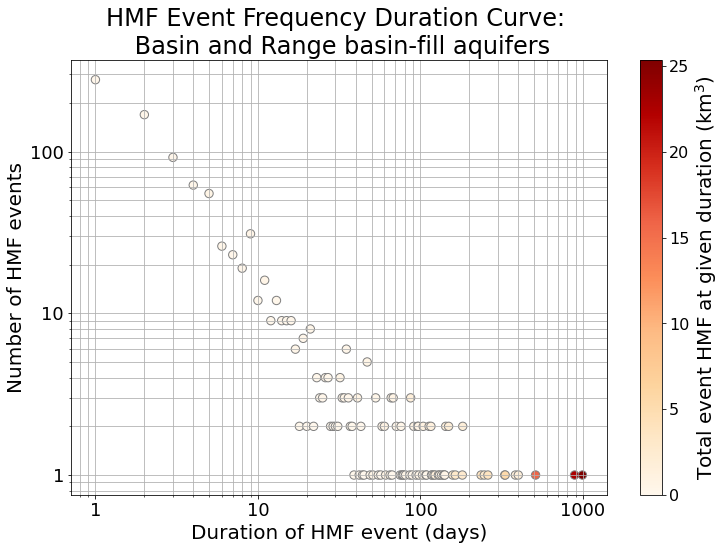

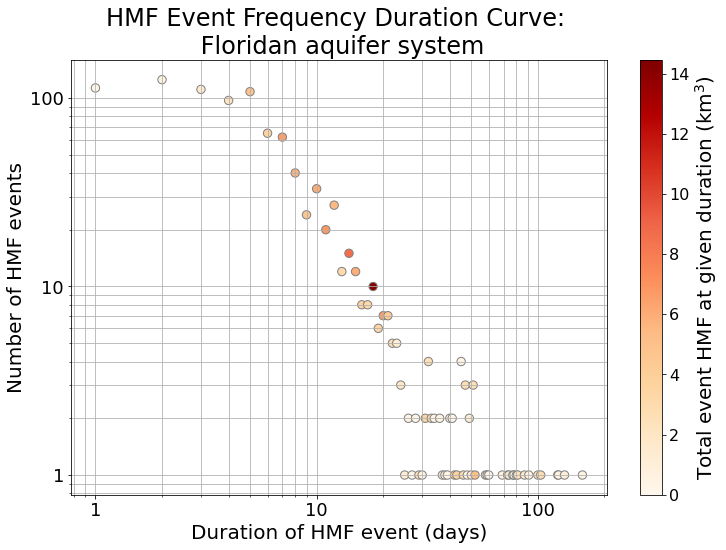

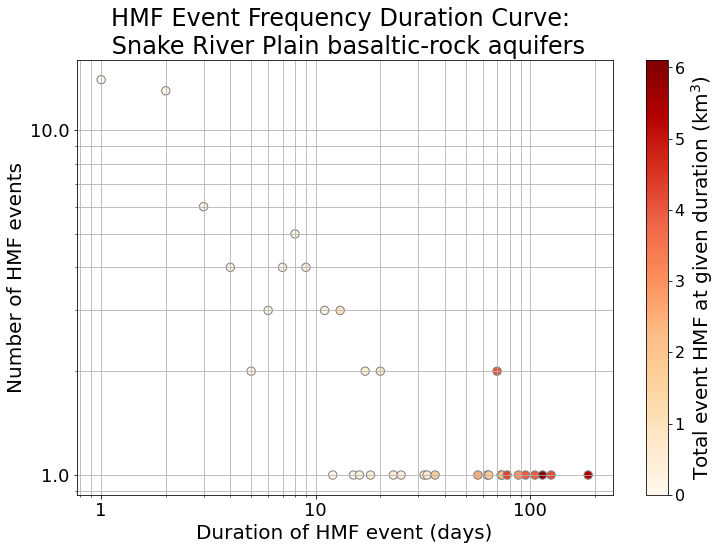

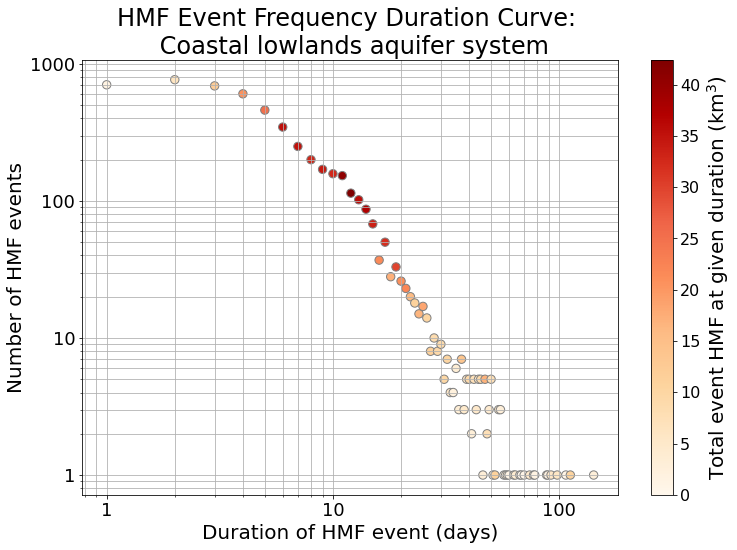

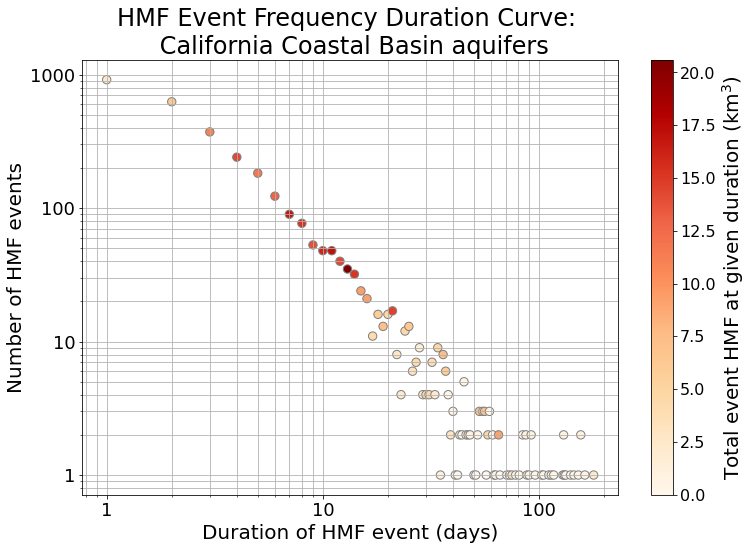

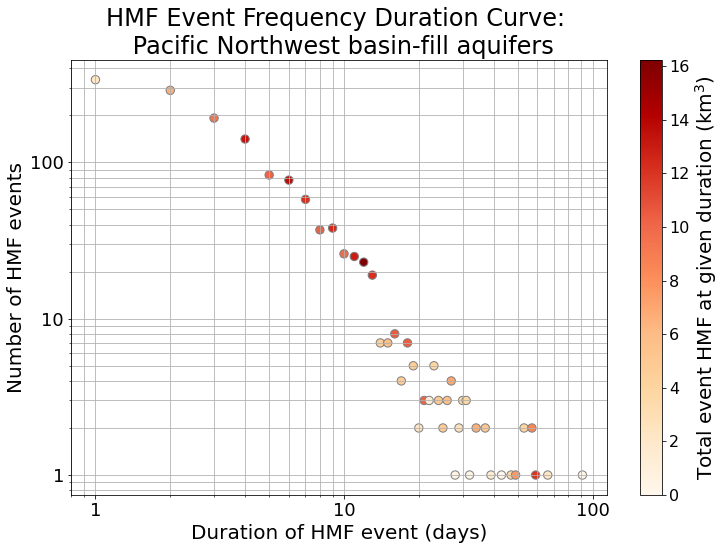

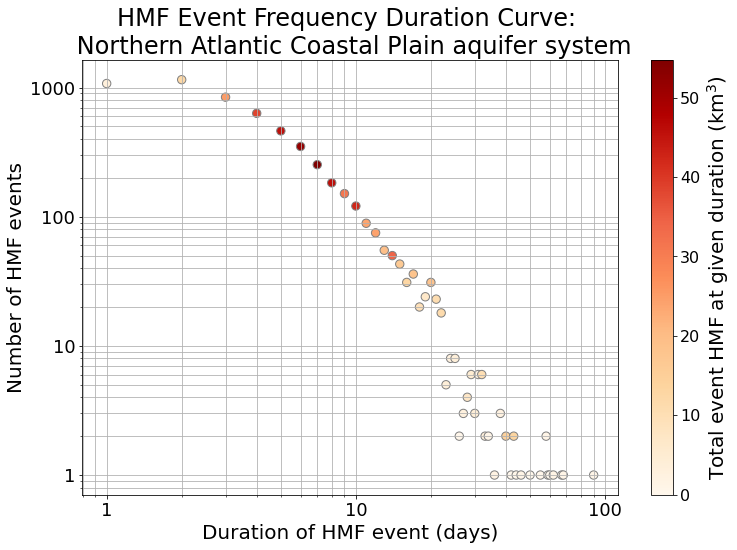

In [101]:
# All aquifers
for aq in aq_codes:
    df = grouped_aq_events_dict_50_90[aq]
    fdc_events(df, aq)

In [90]:
combined_events_by_aq_dict = {}
for aq in aq_codes:
    aq_dict = events_by_aq_dict[aq]
    df_events_gages = pd.DataFrame()
    for site in aq_dict.keys():
        df = aq_dict[site]
        df_events_gages_sort = sort_events(df)
        df_events_gages = df_events_gages.append(df_events_gages_sort)
    combined_events_by_aq_dict[aq] = df_events_gages

In [22]:
aq_list_10 = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system']

In [75]:
import matplotlib.ticker as mticker

def fdc_events(df, i):
    df_plot = df

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

    cm = plt.cm.get_cmap('OrRd')
    scatter = ax.scatter(df_plot['duration'], df_plot['count'], c=df_plot['hmf'], vmin=0, vmax=df_plot['hmf'].max(), s=70, cmap=cm, edgecolors='grey')

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Total event HMF at given duration ($\mathregular{km^3}$)', fontsize=20)
    cbar.ax.tick_params(labelsize=16)

    ax.set_xlabel('Duration of HMF event (days)', fontsize=20)
    ax.set_ylabel('Number of HMF events', fontsize=20)
    ax.set_title(f'HMF Event Frequency Duration Curve: \n {aq_list_10[i]}', fontsize=24)

    plt.xscale("log")
    plt.yscale("log")

    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    #ax.mticker.FormatStrFormatter('%d')

    plt.grid('True', which="both", ls="-")
    
    plt.tick_params(axis='both', which='major', labelsize=18)

    img_path = f'Saved_Visuals/Aquifers/fre_dur_curve/fdc_{aq}.png'
    fn.save_plot_as_image(img_path, overwrite=True) 

    plt.show()
    
for i, aq in enumerate(aq_codes):
    df = combined_events_by_aq_dict[aq]
    fdc_events(df, i)

NameError: name 'combined_events_by_aq_dict' is not defined

## Annual metrics timeseries for valid gages

In [22]:
import pyarrow.parquet as pq
annual_metrics_df = pq.read_table('Prelim_Data/annual_metrics_subdf_30_90.parquet')

In [25]:
annual_metrics_df = annual_metrics_df.to_pandas()

In [26]:
annual_metrics_df

AttributeError: 'NoneType' object has no attribute 'items'

     site_no  water_year  annual_hmf  annual_duration  event_hmf  \
0   02342500        1990    0.092031             29.0   0.010226   
1   02342500        1991    0.067863             37.0   0.009695   
2   02342500        1992    0.125069             56.0   0.007817   
3   02342500        1993    0.164619             42.0   0.016462   
4   02342500        1994    0.048014             23.0   0.006002   
..       ...         ...         ...              ...        ...   
25  13018300        2015    0.000051             14.0   0.000013   
26  13018300        2016    0.007294             77.0   0.007294   
27  13018300        2017    0.003553             56.0   0.003553   
28  13018300        2018    0.001694             46.0   0.000847   
29  13018300        2019    0.001353             35.0   0.000338   

    event_duration  total_events  timing  
0         3.222222           9.0   181.0  
1         5.285714           7.0   137.0  
2         3.500000          16.0    58.0  
3         4

In [52]:
gage_no = 11447650
df_gage = annual_metrics_df[annual_metrics_df['site_no'] == str(gage_no)]
cols = ['annual_hmf', 'annual_duration', 'event_hmf', 'event_duration', 'total_events', 'timing']
for col in cols:
    value = df_gage[df_gage[col] != 0][col].mean()
    print(col, round(value, 7))

annual_hmf 2.6324419
annual_duration 54.6
event_hmf 1.0337324
event_duration 20.7608333
total_events 2.7
timing 144.6


In [53]:
df_30_90 = dfs_valid['30_90']
df_30_90[df_30_90['site_no'] == gage_no].transpose()
#df_30_90[df_30_90['site_no'] == '13335050']
#dfs_valid['30_90'][dfs_valid['30_90'][['site_no'] == '11447650']]

AttributeError: 'NoneType' object has no attribute 'items'

                                           784
site_no                               11447650
analyze_start              1990-10-01 00:00:00
analyze_end                2020-09-30 00:00:00
analyze_range                               30
quantile                                   0.9
valid                                     True
missing_data%                                0
threshold                                48800
hmf_years                                   20
annual_hmf                             2.63244
six_mo_hmf                             2.44089
three_mo_hmf                           1.37305
annual_duration                           54.6
event_duration                         20.7608
event_hmf                              1.03373
inter_annual%                           66.667
intra_annual                               2.7
timing                                   144.6
jan_hmf                               0.634699
feb_hmf                                1.18156
mar_hmf      